In [1]:
import pandas as pd

In [2]:
df2 = pd.read_json('C://Users/K.VanDerWalt/Python for Data Science/spotify_raw/KV/StreamingHistory0.json')
df2.head()

,endTime,artistName,trackName,msPlayed
0,2021-03-22 12:44,Philosophize This!,Episode #132 ... Carl Schmitt on Liberalism pt. 1,1427898
1,2021-03-22 13:07,Philosophize This!,Episode #133 ... Carl Schmitt on Liberalism pt. 2,1342275
2,2021-03-22 13:42,Philosophize This!,Episode #134 ... Consequences of Reason,328452
3,2021-03-23 03:53,Philosophize This!,Episode #134 ... Consequences of Reason,22510
4,2021-03-31 09:56,Z.Z. Hill,That Ain't The Way You Make Love,13641


In [3]:
df3 = pd.read_json('C://Users/K.VanDerWalt/Python for Data Science/spotify_raw/KV/StreamingHistory1.json')
df3.head()

,endTime,artistName,trackName,msPlayed
0,2021-11-09 11:09,Howard Shore,The Nazgûl,364893
1,2021-11-09 11:11,Howard Shore,Weathertop,134386
2,2021-11-09 11:16,Howard Shore,The Caverns of Isengard,294253
3,2021-11-09 11:21,Howard Shore,Give up the Halfling,289066
4,2021-11-09 11:22,Howard Shore,Orthanc,66413


In [4]:
df = df2.append(df3)
df.head()

,endTime,artistName,trackName,msPlayed
0,2021-03-22 12:44,Philosophize This!,Episode #132 ... Carl Schmitt on Liberalism pt. 1,1427898
1,2021-03-22 13:07,Philosophize This!,Episode #133 ... Carl Schmitt on Liberalism pt. 2,1342275
2,2021-03-22 13:42,Philosophize This!,Episode #134 ... Consequences of Reason,328452
3,2021-03-23 03:53,Philosophize This!,Episode #134 ... Consequences of Reason,22510
4,2021-03-31 09:56,Z.Z. Hill,That Ain't The Way You Make Love,13641


In [5]:
df.describe()

,msPlayed
count,1.791000e+04
mean,2.017257e+05
std,1.128087e+05
min,0.000000e+00
25%,1.552962e+05
50%,2.058705e+05
75%,2.479200e+05
max,3.663158e+06


In [6]:
len(df.index)

17910

In [7]:
artists = df.groupby('artistName').sum('msPlayed')
artists = artists.sort_values('msPlayed', ascending = False)
artists

,msPlayed
artistName,
Phoebe Bridgers,63696530
Dirk Freymuth,61940239
Kacey Musgraves,60906112
Ola Gjeilo,60612732
Tori Amos,59354982
...,...
Dan Auerbach,1438
Grimes,1280
Chris Webby,1270


In [8]:
genres1 = pd.read_csv('C://Users/K.VanDerWalt/Python for Data Science/mtv_artists_genres/10000-MTV-Music-Artists-page-1.csv')
genres2 = pd.read_csv('C://Users/K.VanDerWalt/Python for Data Science/mtv_artists_genres/10000-MTV-Music-Artists-page-2.csv')
genres3 = pd.read_csv('C://Users/K.VanDerWalt/Python for Data Science/mtv_artists_genres/10000-MTV-Music-Artists-page-3.csv')
genres4 = pd.read_csv('C://Users/K.VanDerWalt/Python for Data Science/mtv_artists_genres/10000-MTV-Music-Artists-page-3.csv')
genres = genres1.append([genres2, genres3, genres4])
genres.head()

,name,facebook,twitter,website,genre,mtv
0,Adele,http://www.facebook.com/9770929278,http://www.twitter.com/officialadele,NaN,Pop,http://www.mtv.com/artists/adele/biography
1,Joey + Rory,http://www.facebook.com/15044507815,http://www.twitter.com/joeyandrory,NaN,Country,http://www.cmt.com/artists/joey-rory/biography
2,Draaco Aventura,http://www.facebook.com/856796091053581,http://www.twitter.com/DraacoAventura,http://www.bandpage.com/draacoaventura,Pop Latino,http://www.mtv.com/artists/draaco-aventura/bio...
3,Justin Bieber,http://www.facebook.com/309570926875,http://www.twitter.com/justinbieber,http://www.justinbiebermusic.com,Pop,http://www.mtv.com/artists/justin-bieber/biogr...
4,Peer van Mladen,http://www.facebook.com/264487966,http://www.twitter.com/Predrag_Jugovic,http://pejaintergroup.eu/Peer_van_Mladen.html,House,http://www.mtv.com/artists/peer-van-mladen/bio...


In [9]:
genres = genres.rename(columns={"name":"artistName"})
genres.head(1)

,artistName,facebook,twitter,website,genre,mtv
0,Adele,http://www.facebook.com/9770929278,http://www.twitter.com/officialadele,NaN,Pop,http://www.mtv.com/artists/adele/biography


In [10]:
genres['artistName'] = genres['artistName'].str.strip()
genres.head(1)

,artistName,facebook,twitter,website,genre,mtv
0,Adele,http://www.facebook.com/9770929278,http://www.twitter.com/officialadele,NaN,Pop,http://www.mtv.com/artists/adele/biography


In [11]:
artists = artists.merge(genres, on = 'artistName', how='inner')
artists.head(1)
# df_excellent_genre_avg_rating.merge(df_satisfactory_genre_avg_rating, on='genres', how='outer')

,artistName,msPlayed,facebook,twitter,website,genre,mtv
0,Kacey Musgraves,60906112,http://www.facebook.com/117664178308367,http://www.twitter.com/kaceymusgraves,http://kaceymusgraves.com,Country,http://www.cmt.com/artists/kacey-musgraves/bio...


In [12]:
top_genres = artists.groupby('genre').sum('msPlayed')
top_genres = top_genres.sort_values('msPlayed', ascending = False)
top_genres.head(10)

,msPlayed
genre,
Rock,320918198
Pop,151003215
Alternative,140762240
Country,80427193
Singer/Songwriter,65608832
Electronic,51122254
Jazz,46056748
Hip-Hop/Rap,38006904
Alternative Folk,32252073


This shows some of the top genres of all time. It's important to now dig deeper and get an idea of trends by genre. This will help inform the technique for a recommender system.

In [13]:
top_genres['msPlayed'] = top_genres['msPlayed']/3.6e+6

<AxesSubplot:ylabel='genre'>

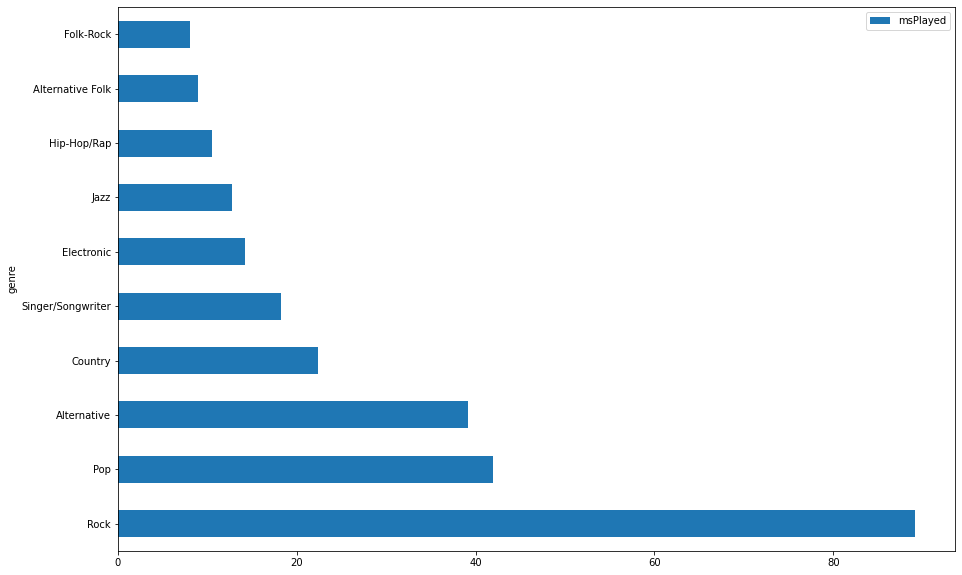

In [14]:
top_genres.head(10).plot.barh(y='msPlayed',figsize=(15,10))

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17910 entries, 0 to 7909
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     17910 non-null  object
 1   artistName  17910 non-null  object
 2   trackName   17910 non-null  object
 3   msPlayed    17910 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 699.6+ KB


In [16]:
df['endTime'] = pd.to_datetime(df['endTime'], infer_datetime_format=True).dt.date
df

,endTime,artistName,trackName,msPlayed
0,2021-03-22,Philosophize This!,Episode #132 ... Carl Schmitt on Liberalism pt. 1,1427898
1,2021-03-22,Philosophize This!,Episode #133 ... Carl Schmitt on Liberalism pt. 2,1342275
2,2021-03-22,Philosophize This!,Episode #134 ... Consequences of Reason,328452
3,2021-03-23,Philosophize This!,Episode #134 ... Consequences of Reason,22510
4,2021-03-31,Z.Z. Hill,That Ain't The Way You Make Love,13641
...,...,...,...,...
7905,2022-03-11,Penguin Cafe,More Milk - Bonus Track,294972
7906,2022-03-11,The Wild Reeds,Be The Change,188040
7907,2022-03-11,The Killers,Runaway Horses,29234
7908,2022-03-11,Bladee,Mean Girls,20528


In [17]:
df['week'] = pd.to_datetime(df['endTime']).dt.to_period('W')
df.head()

,endTime,artistName,trackName,msPlayed,week
0,2021-03-22,Philosophize This!,Episode #132 ... Carl Schmitt on Liberalism pt. 1,1427898,2021-03-22/2021-03-28
1,2021-03-22,Philosophize This!,Episode #133 ... Carl Schmitt on Liberalism pt. 2,1342275,2021-03-22/2021-03-28
2,2021-03-22,Philosophize This!,Episode #134 ... Consequences of Reason,328452,2021-03-22/2021-03-28
3,2021-03-23,Philosophize This!,Episode #134 ... Consequences of Reason,22510,2021-03-22/2021-03-28
4,2021-03-31,Z.Z. Hill,That Ain't The Way You Make Love,13641,2021-03-29/2021-04-04


In [18]:
hours_per_week = df.groupby('week').sum('msPlayed').sort_values('week', ascending = True)
hours_per_week.head(1)

,msPlayed
week,
2021-03-22/2021-03-28,3121135


In [19]:
hours_per_week['msPlayed'] = hours_per_week['msPlayed']/3.6e+6

<AxesSubplot:xlabel='week'>

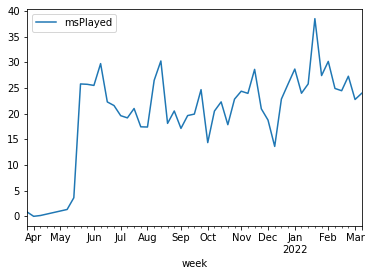

In [20]:
hours_per_week.plot.line()

In [21]:
df = df.merge(genres, on = 'artistName', how='inner')
df.head(1)

,endTime,artistName,trackName,msPlayed,week,facebook,twitter,website,genre,mtv
0,2021-05-04,Melody Gardot,From Paris With Love - Single Version,288693,2021-05-03/2021-05-09,http://www.facebook.com/85191657165,http://www.twitter.com/mgardot,NaN,Rock,http://www.mtv.com/artists/melody-gardot/biogr...


In [22]:
df = df.dropna(subset=['genre'])
df

,endTime,artistName,trackName,msPlayed,week,facebook,twitter,website,genre,mtv
0,2021-05-04,Melody Gardot,From Paris With Love - Single Version,288693,2021-05-03/2021-05-09,http://www.facebook.com/85191657165,http://www.twitter.com/mgardot,NaN,Rock,http://www.mtv.com/artists/melody-gardot/biogr...
1,2021-05-24,Melody Gardot,Morning Sun,305265,2021-05-24/2021-05-30,http://www.facebook.com/85191657165,http://www.twitter.com/mgardot,NaN,Rock,http://www.mtv.com/artists/melody-gardot/biogr...
2,2021-05-27,Melody Gardot,Once I Was Loved,8544,2021-05-24/2021-05-30,http://www.facebook.com/85191657165,http://www.twitter.com/mgardot,NaN,Rock,http://www.mtv.com/artists/melody-gardot/biogr...
3,2021-05-27,Melody Gardot,Preacherman,270280,2021-05-24/2021-05-30,http://www.facebook.com/85191657165,http://www.twitter.com/mgardot,NaN,Rock,http://www.mtv.com/artists/melody-gardot/biogr...
4,2021-08-11,Melody Gardot,Baby I'm A Fool,210693,2021-08-09/2021-08-15,http://www.facebook.com/85191657165,http://www.twitter.com/mgardot,NaN,Rock,http://www.mtv.com/artists/melody-gardot/biogr...
...,...,...,...,...,...,...,...,...,...,...
6251,2022-03-11,Migos,Stir Fry,190288,2022-03-07/2022-03-13,NaN,http://www.twitter.com/migos,http://www.youtube.com/watch?v=FPtM9oOlg4c,Hip-Hop/Rap,http://www.mtv.com/artists/migos/biography
6252,2022-03-11,Martin Solveig,Juliet & Romeo,204514,2022-03-07/2022-03-13,http://www.facebook.com/27588115472,http://www.twitter.com/martinsolveig,NaN,Electronic/Dance,http://www.mtv.com/artists/martin-solveig/biog...
6253,2022-03-11,Skee-Lo,I Wish - Radio Edit,252306,2022-03-07/2022-03-13,NaN,http://twitter.com/skeelo_musik,http://www.wegotfreshideas.com,Alternative Rap,http://www.mtv.com/artists/skee-lo/biography
6254,2022-03-11,Depeche Mode,Enjoy the Silence,255133,2022-03-07/2022-03-13,http://www.facebook.com/26101560328,http://www.twitter.com/depechemode,http://www.depechemode.com,Alternative,http://www.mtv.com/artists/depeche-mode/biography


In [23]:
df['msPlayed'] = df['msPlayed']/60000


In [24]:
df = df[df['genre'].str.contains('Rock|Pop|Alternative|Country|Singer/Songwriter|Electronic|Jazz|Hip-Hop/Rap|Alternative Folk|Folk-Rock', na = False)]
df.head()

,endTime,artistName,trackName,msPlayed,week,facebook,twitter,website,genre,mtv
0,2021-05-04,Melody Gardot,From Paris With Love - Single Version,4.811550,2021-05-03/2021-05-09,http://www.facebook.com/85191657165,http://www.twitter.com/mgardot,NaN,Rock,http://www.mtv.com/artists/melody-gardot/biogr...
1,2021-05-24,Melody Gardot,Morning Sun,5.087750,2021-05-24/2021-05-30,http://www.facebook.com/85191657165,http://www.twitter.com/mgardot,NaN,Rock,http://www.mtv.com/artists/melody-gardot/biogr...
2,2021-05-27,Melody Gardot,Once I Was Loved,0.142400,2021-05-24/2021-05-30,http://www.facebook.com/85191657165,http://www.twitter.com/mgardot,NaN,Rock,http://www.mtv.com/artists/melody-gardot/biogr...
3,2021-05-27,Melody Gardot,Preacherman,4.504667,2021-05-24/2021-05-30,http://www.facebook.com/85191657165,http://www.twitter.com/mgardot,NaN,Rock,http://www.mtv.com/artists/melody-gardot/biogr...
4,2021-08-11,Melody Gardot,Baby I'm A Fool,3.511550,2021-08-09/2021-08-15,http://www.facebook.com/85191657165,http://www.twitter.com/mgardot,NaN,Rock,http://www.mtv.com/artists/melody-gardot/biogr...


In [25]:
pop = df.loc[df['genre'] == 'Pop']
pop.head(1)

,endTime,artistName,trackName,msPlayed,week,facebook,twitter,website,genre,mtv
532,2021-05-14,The Beatles,Blackbird - Remastered 2009,2.306433,2021-05-10/2021-05-16,http://www.facebook.com/69116329538,http://www.twitter.com/thebeatles,http://www.miramax-aharddaysnight.com/,Pop,http://www.mtv.com/artists/the-beatles/biography


In [26]:
pop = pop.groupby(['week', 'genre']).sum('msPlayed').sort_values('week', ascending = True)
pop.head(1)

,,msPlayed
week,genre,
2021-05-10/2021-05-16,Pop,8.194367


<AxesSubplot:xlabel='week,genre'>

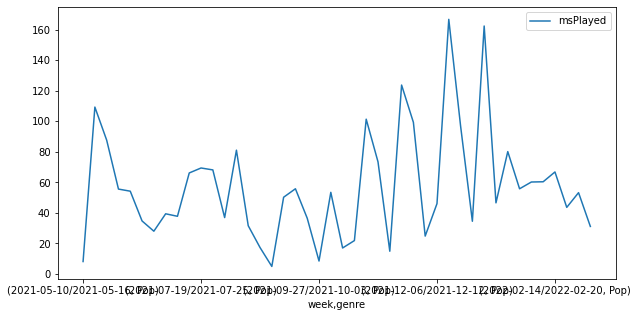

In [27]:
pop.plot.line(figsize=(10,5))

In [28]:
df_summary = df.groupby(['week', 'genre']).sum('msPlayed').sort_values('week', ascending = True)
df_summary.head(1)

,,msPlayed
week,genre,
2021-05-03/2021-05-09,Electronic,5.129767


In [29]:
df_summary = df_summary.unstack(level=1)
df_summary.head(5)

msPlayed                                  \
genre                 Adult Alternative Alternative Alternative Country   
week                                                                      
2021-05-03/2021-05-09               NaN         NaN                 NaN   
2021-05-10/2021-05-16               NaN    9.272100                 NaN   
2021-05-17/2021-05-23               NaN   14.042867                 NaN   
2021-05-24/2021-05-30             4.352   53.599000                 NaN   
2021-05-31/2021-06-06               NaN   51.101967                 NaN   

                                                                   \
genre                 Alternative Folk Alternative Rap Blues-Rock   
week                                                                
2021-05-03/2021-05-09              NaN             NaN        NaN   
2021-05-10/2021-05-16              NaN             NaN        NaN   
2021-05-17/2021-05-23        17.056850             NaN        NaN   
2021-05-24/2021-05-30         0.901333             NaN        NaN   
2021-05-31/2021-06-06              NaN             NaN   4.529333   

                                                                      \
genre                 Classic Rock College Rock Contemporary Country   
week                                                                   
2021-05-03/2021-05-09          NaN          NaN                  NaN   
2021-05-10/2021-05-16          NaN          NaN            53.830300   
2021-05-17/2021-05-23          NaN          NaN             4.995550   
2021-05-24/2021-05-30      3.56220     3.104833             8.672383   
2021-05-31/2021-06-06     17.44405          NaN            11.623967   

                                                      ...        \
genre                 Contemporary Singer/Songwriter  ... K-Pop   
week                                                  ...         
2021-05-03/2021-05-09                            NaN  ...   NaN   
2021-05-10/2021-05-16                            NaN  ...   NaN   
2021-05-17/2021-05-23                       2.473333  ...   NaN   
2021-05-24/2021-05-30                       9.502650  ...   NaN   
2021-05-31/2021-06-06                            NaN  ...   NaN   

                                                                               \
genre                 Outlaw Country         Pop  Pop/Rock Prog-Rock/Art Rock   
week                                                                            
2021-05-03/2021-05-09            NaN         NaN       NaN                NaN   
2021-05-10/2021-05-16            NaN    8.194367       NaN                NaN   
2021-05-17/2021-05-23            NaN  109.285417       NaN                NaN   
2021-05-24/2021-05-30            NaN   87.648467  11.95265           0.129233   
2021-05-31/2021-06-06            NaN   55.616400  21.10955                NaN   

                                                                               \
genre                        Rock Rock & Roll Singer/Songwriter Southern Rock   
week                                                                            
2021-05-03/2021-05-09    4.841617         NaN          3.297267           NaN   
2021-05-10/2021-05-16    9.049933         NaN          3.554217           NaN   
2021-05-17/2021-05-23  176.992583         NaN         77.936700           NaN   
2021-05-24/2021-05-30  110.785567     4.44905         19.446500           NaN   
2021-05-31/2021-06-06  163.178800    29.17865         10.662650           NaN   

                                  
genre                 Vocal Jazz  
week                              
2021-05-03/2021-05-09        NaN  
2021-05-10/2021-05-16        NaN  
2021-05-17/2021-05-23        NaN  
2021-05-24/2021-05-30        NaN  
2021-05-31/2021-06-06        NaN  

[5 rows x 31 columns]

array([<AxesSubplot:xlabel='week'>, <AxesSubplot:xlabel='week'>,
       <AxesSubplot:xlabel='week'>, <AxesSubplot:xlabel='week'>,
       <AxesSubplot:xlabel='week'>, <AxesSubplot:xlabel='week'>,
       <AxesSubplot:xlabel='week'>, <AxesSubplot:xlabel='week'>,
       <AxesSubplot:xlabel='week'>, <AxesSubplot:xlabel='week'>,
       <AxesSubplot:xlabel='week'>, <AxesSubplot:xlabel='week'>,
       <AxesSubplot:xlabel='week'>, <AxesSubplot:xlabel='week'>,
       <AxesSubplot:xlabel='week'>, <AxesSubplot:xlabel='week'>,
       <AxesSubplot:xlabel='week'>, <AxesSubplot:xlabel='week'>,
       <AxesSubplot:xlabel='week'>, <AxesSubplot:xlabel='week'>,
       <AxesSubplot:xlabel='week'>, <AxesSubplot:xlabel='week'>,
       <AxesSubplot:xlabel='week'>, <AxesSubplot:xlabel='week'>,
       <AxesSubplot:xlabel='week'>, <AxesSubplot:xlabel='week'>,
       <AxesSubplot:xlabel='week'>, <AxesSubplot:xlabel='week'>,
       <AxesSubplot:xlabel='week'>, <AxesSubplot:xlabel='week'>,
       <AxesSubplot:xlabe

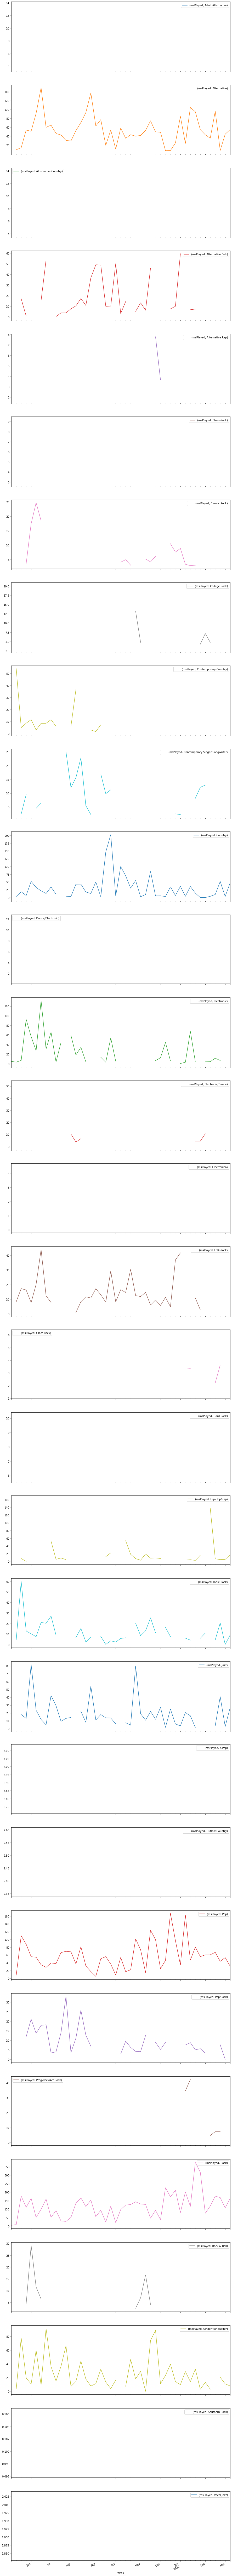

In [30]:
df_summary.plot.line(subplots=True, figsize=(15,200))

Let's create a hybrid recommender system as follows:

1) Find the genres with the largest increase for recent activity

2) Of those genres, find the top recent artists

3) The user can go to spotify's artists radio for those artists and discover new music

4) This addresses a niche in Spotify's recommendations, since in the app there's no straightforward way to work out one's recent top artists. It does have a section for top genres, however the resulting content is not specifically tailored to the user, in the way that "discover weekly" is.

5) So this combines more macro trends of top genres, which are less immediately obvious to the user (it's quite easy to recall artists one has been interested in recently). It groups together multiple artists and finds overall genres that the user has been gravitating towards. Then, by giving the top artists of that genre, it allows Spotify to continue the heavy lifting of a recommender system via "go to artist radio"

In [31]:
df_summary = df.groupby(['endTime', 'genre']).sum('msPlayed').sort_values('endTime', ascending = True)
df_summary.head(1)

,,msPlayed
endTime,genre,
2021-05-04,Rock,4.81155


In [32]:
import datetime 
old = df_summary.loc[datetime.date(year=2021,month=1,day=1):datetime.date(year=2022,month=1,day=1)]
old.head(1)

,,msPlayed
endTime,genre,
2021-05-04,Rock,4.81155


In [33]:
old = old.groupby('genre').mean('msPlayed').sort_values('msPlayed', ascending = False)
old.head(10)

,msPlayed
genre,
Rock,20.050596
Pop,14.070838
Electronic,13.332981
Hip-Hop/Rap,12.397232
Alternative,12.070553
Country,12.051072
Singer/Songwriter,9.895061
Alternative Folk,9.507669
Jazz,8.869283


In [34]:
recent = df_summary.loc[datetime.date(year=2022,month=1,day=1):datetime.date(year=2023,month=1,day=1)]
recent.head(1)

,,msPlayed
endTime,genre,
2022-01-01,Rock,6.2669


In [35]:
recent = recent.groupby('genre').mean('msPlayed').sort_values('msPlayed', ascending = False)
recent.head(5)

,msPlayed
genre,
Rock,29.451590
Prog-Rock/Art Rock,19.268983
Alternative,13.240912
Pop,12.950779
Country,11.976593


In [36]:
changes = old.merge(recent, on='genre', how='outer')
changes.head(5)

,msPlayed_x,msPlayed_y
genre,,
Rock,20.050596,29.451590
Pop,14.070838,12.950779
Electronic,13.332981,8.106972
Hip-Hop/Rap,12.397232,11.737958
Alternative,12.070553,13.240912


In [37]:
changes['change'] = changes['msPlayed_y'] - changes['msPlayed_x']
changes = changes.sort_values('change', ascending = False)
changes = changes.head(5)
changes

,msPlayed_x,msPlayed_y,change
genre,,,
Prog-Rock/Art Rock,4.463617,19.268983,14.805367
Rock,20.050596,29.451590,9.400993
Jazz,8.869283,11.491115,2.621832
Glam Rock,1.225367,3.737963,2.512597
Dance/Electronic,4.040992,6.484842,2.443850


In [38]:
top_genre_artists = df.merge(changes, on='genre', how='inner')
top_genre_artists.head(1)

,endTime,artistName,trackName,msPlayed,week,facebook,twitter,website,genre,mtv,msPlayed_x,msPlayed_y,change
0,2021-05-04,Melody Gardot,From Paris With Love - Single Version,4.81155,2021-05-03/2021-05-09,http://www.facebook.com/85191657165,http://www.twitter.com/mgardot,NaN,Rock,http://www.mtv.com/artists/melody-gardot/biogr...,20.050596,29.45159,9.400993


In [39]:
top_genre_artists = top_genre_artists.groupby(['artistName', 'genre']).sum('msPlayed').sort_values('msPlayed', ascending = False)
top_genre_artists.head(10)

,,msPlayed,msPlayed_x,msPlayed_y,change
artistName,genre,,,,
Tori Amos,Rock,989.249700,5052.750293,7421.800626,2369.050333
Coldplay,Rock,818.062750,4130.422859,6067.027496,1936.604637
First Aid Kit,Rock,183.339233,1102.782802,1619.837438,517.054636
Diana Krall,Jazz,165.367150,407.987012,528.591303,120.604291
The Killers,Rock,147.096217,842.125049,1236.966771,394.841722
John Mayer,Rock,144.062650,741.872067,1089.708822,347.836755
Frank Sinatra,Jazz,136.519767,381.379163,494.117957,112.738794
Eagles,Rock,132.533300,421.062524,618.483385,197.420861
Bob Dylan,Rock,121.415867,561.416699,824.644514,263.227815
